<a href="https://colab.research.google.com/github/SAQUIBZEYA/ML_Project/blob/master/COVID_19_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importing the required libraries
import pandas as pd

#visualisation libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!pip install plotly

#Reading the data sets

In [0]:
#reading the datasets
df=pd.read_csv('/content/covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [0]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [0]:
df.shape

(27166, 8)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27166 entries, 0 to 27165
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              27166 non-null  int64  
 1   ObservationDate  27166 non-null  object 
 2   Province/State   13157 non-null  object 
 3   Country/Region   27166 non-null  object 
 4   Last Update      27166 non-null  object 
 5   Confirmed        27166 non-null  float64
 6   Deaths           27166 non-null  float64
 7   Recovered        27166 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.7+ MB


In [0]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

In [0]:
#Since the final count of cases is present on 20th May 2020 we will create a separate dataframe for the same

from datetime import date
recent=df[['ObservationDate']][-1:].max()
df_update=df.loc[df.ObservationDate==pd.Timestamp(recent['ObservationDate'])]
df.update

<bound method DataFrame.update of          SNo ObservationDate Province/State  ... Confirmed Deaths  Recovered
0          1      2020-01-22          Anhui  ...         1      0          0
1          2      2020-01-22        Beijing  ...        14      0          0
2          3      2020-01-22      Chongqing  ...         6      0          0
3          4      2020-01-22         Fujian  ...         1      0          0
4          5      2020-01-22          Gansu  ...         0      0          0
...      ...             ...            ...  ...       ...    ...        ...
27161  27162      2020-05-20        Yucatan  ...      1244     97        797
27162  27163      2020-05-20          Yukon  ...        11      0         11
27163  27164      2020-05-20         Yunnan  ...       185      2        183
27164  27165      2020-05-20      Zacatecas  ...       212     27        134
27165  27166      2020-05-20       Zhejiang  ...      1268      1       1267

[27166 rows x 8 columns]>

In [0]:
df_update.isnull().sum()

SNo                  0
ObservationDate      0
Province/State     178
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [0]:
df_update['Province/State']=df_update.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)
df['Province/State']=df.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)

In [0]:
df_update['Country/Region']=df_update.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)
df['Country/Region']=df.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)

In [0]:
#We perform encoding of the Country to CountryID and Province to ProvinceID

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_update['ProvinceID']=le.fit_transform(df_update['Province/State'])
df_update['CountryID']=le.fit_transform(df_update['Country/Region'])
df_update

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ProvinceID,CountryID
26714,26715,2020-05-20,Afghanistan,Afghanistan,2020-05-21 02:32:48,8145,187,930,2,0
26715,26716,2020-05-20,Albania,Albania,2020-05-21 02:32:48,964,31,758,7,1
26716,26717,2020-05-20,Algeria,Algeria,2020-05-21 02:32:48,7542,568,3968,9,2
26717,26718,2020-05-20,Andorra,Andorra,2020-05-21 02:32:48,762,51,639,13,3
26718,26719,2020-05-20,Angola,Angola,2020-05-21 02:32:48,52,3,17,14,4
...,...,...,...,...,...,...,...,...,...,...
27161,27162,2020-05-20,Yucatan,Mexico,2020-05-21 02:32:48,1244,97,797,439,114
27162,27163,2020-05-20,Yukon,Canada,2020-05-21 02:32:48,11,0,11,440,32
27163,27164,2020-05-20,Yunnan,China,2020-05-21 02:32:48,185,2,183,441,36
27164,27165,2020-05-20,Zacatecas,Mexico,2020-05-21 02:32:48,212,27,134,442,114


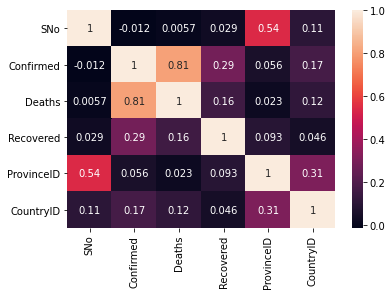

In [0]:
corr=df_update.corr()
sns.heatmap(corr,annot=True)

#Number of countries impacted untill now due to covid-19

In [0]:
print(df['Country/Region'].unique())
print("\nNumber of countries impacted by COVID 2019:",len(df['Country/Region'].unique()))

['China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia'
 'Pales

In [0]:
group_cases=df_update[['Confirmed','Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Confirmed',ascending=False).head(5)
group_cases=group_cases.reset_index()
group_cases

,Country/Region,Confirmed,Recovered,Deaths
0,US,1551853,294312,93439
1,Russia,308705,85392,2972
2,Brazil,291579,116683,18859
3,UK,249619,1116,35786
4,Spain,232555,150376,27888


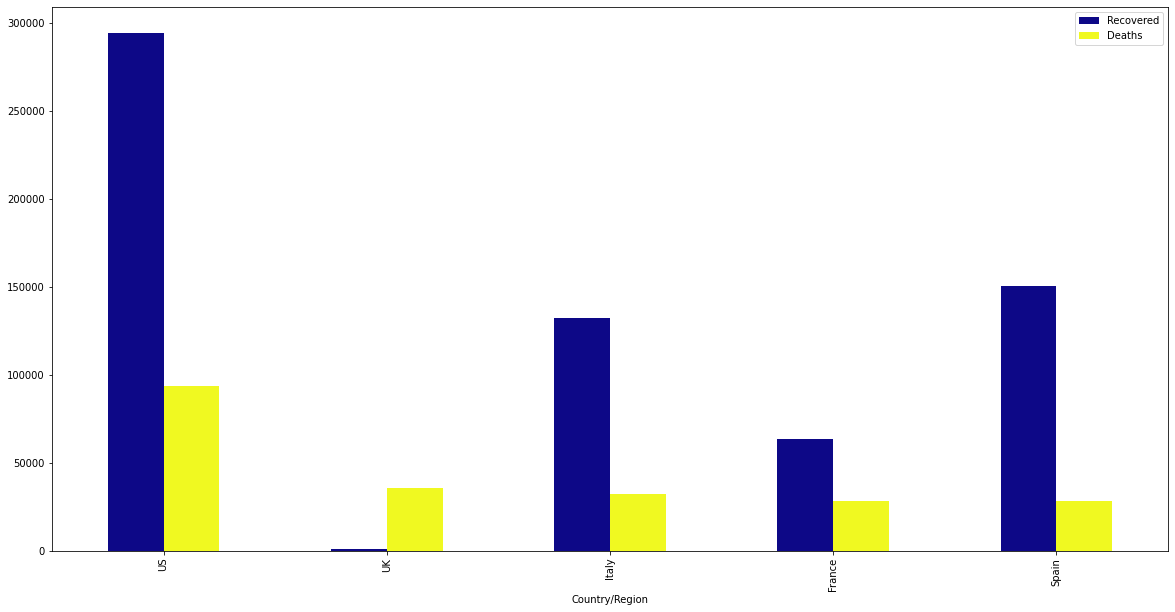

In [0]:
group_cases=df_update[['Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Deaths',ascending=False).head()
group_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()